### Libraries

In [30]:
from mobfot import MobFot
client = MobFot()

In [31]:
league = client.get_league("71")

In [32]:
league.keys()

dict_keys(['tabs', 'allAvailableSeasons', 'details', 'seostr', 'QAData', 'table', 'transfers', 'overview', 'stats', 'matches', 'playoff'])

### her takım

In [33]:
import pandas as pd

# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

In [34]:
import pandas as pd

# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"team_name": league["table"][0]["data"]["table"]["all"][i]["name"], "team_id": league["table"][0]["data"]["table"]["all"][i]["id"]}
    
    # Append the new row to the DataFrame
    league_df = pd.concat([league_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(league_df)

           team_name team_id
0         Fenerbahçe    8695
1        Galatasaray    8637
2    Adana Demirspor    1926
3           Beşiktaş   10188
4          Hatayspor   95749
5           Rizespor    2166
6        Trabzonspor    9752
7          Kasımpaşa    4685
8          Sivasspor    6265
9        Kayserispor   10182
10        Alanyaspor    4678
11        Ankaragücü    9742
12       Antalyaspor    1931
13         Konyaspor    8622
14        Başakşehir    1933
15  Fatih Karagümrük    2088
16         Gaziantep    4081
17        Pendikspor   95745
18      Istanbulspor  106560
19        Samsunspor    9750


### Select Team

In [35]:
team_name = "Fenerbahçe"

In [36]:
if team_name in league_df["team_name"].values:
    sonuc = league_df.loc[league_df["team_name"] == team_name, "team_id"].values[0]

In [37]:
team = client.get_team(sonuc)

In [38]:
team["squad"]

[['coach',
  [{'id': 574952,
    'name': 'Ismail Kartal',
    'ccode': 'TUR',
    'cname': 'Turkiye'}]],
 ['keepers',
  [{'id': 383971,
    'name': 'Dominik Livakovic',
    'ccode': 'CRO',
    'cname': 'Croatia',
    'role': 'goalkeepers'},
   {'id': 707777,
    'name': 'Irfan Egribayat',
    'ccode': 'TUR',
    'cname': 'Turkiye',
    'role': 'goalkeepers'},
   {'id': 1368027,
    'name': 'Furkan Akyuz',
    'ccode': 'TUR',
    'cname': 'Turkiye',
    'role': 'goalkeepers'},
   {'id': 1535420,
    'name': 'Muhammet Demir',
    'ccode': 'TUR',
    'cname': 'Turkiye',
    'role': 'goalkeepers'}]],
 ['defenders',
  [{'id': 150134,
    'name': 'Serdar Aziz',
    'ccode': 'TUR',
    'cname': 'Turkiye',
    'role': 'defenders'},
   {'id': 407765,
    'name': 'Alexander Djiku',
    'ccode': 'GHA',
    'cname': 'Ghana',
    'role': 'defenders'},
   {'id': 424380,
    'name': 'Samet Akaydin',
    'ccode': 'TUR',
    'cname': 'Turkiye',
    'role': 'defenders'},
   {'id': 618718,
    'name': 'B

In [39]:
keepers = team["squad"][1][1]
defenders = team["squad"][2][1]
midfielders = team["squad"][3][1]
attackers = team["squad"][4][1]

In [40]:
players = keepers + defenders + midfielders + attackers

In [41]:
players[0]["name"]
players[0]["id"]

383971

### players al yukarıdaki gibi

In [42]:
# Create an empty DataFrame with column names
player_df = pd.DataFrame(columns=["player_name", "player_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(players)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"player_name": players[i]["name"], "player_id": players[i]["id"]}
    
    # Append the new row to the DataFrame
    player_df = pd.concat([player_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(player_df)

            player_name player_id
0     Dominik Livakovic    383971
1       Irfan Egribayat    707777
2          Furkan Akyuz   1368027
3        Muhammet Demir   1535420
4           Serdar Aziz    150134
5       Alexander Djiku    407765
6         Samet Akaydin    424380
7   Bright Osayi-Samuel    618718
8               Lincoln    637589
9            Luan Peres    763386
10       Ferdi Kadioglu    774448
11        Rodrigo Becao    844504
12          Mert Müldür    904098
13   Jayden Oosterwolde   1174351
14    Ahmet Necat Aydin   1460972
15                 Fred    322049
16            Miha Zajc    396949
17         Cengiz Ünder    603477
18             Emre Mor    683333
19  Sebastian Szymanski    765466
20    Mert Hakan Yandas    796006
21        Miguel Crespo    850288
22        Ismail Yüksek   1183589
23         Bartug Elmaz   1216728
24       Yusuf Kocatürk   1362125
25      Efekan Karayazi   1522333
26           Edin Dzeko     15403
27          Dusan Tadic     94267
28          Jo

In [43]:
player_name = "Edin Dzeko"

In [44]:
if player_name in player_df["player_name"].values:
    sonuc = player_df.loc[player_df["player_name"] == player_name, "player_id"].values[0]

In [45]:
player = client.get_player(sonuc)

In [46]:
player
playername = player["name"]

### Select Player

In [47]:
# player = client.get_player("661761") 
# playername = "Riccardo Orsolini"

# player = client.get_player("94267") 
# playername = "Dusan Tadic"

# player = client.get_player("1387389") 
# playername = "Arthur Vermeeren"

# player = client.get_player("765466") 
# playername = "Sebastian Szymanski"


### Recent Matches

In [48]:
res = list(player["recentMatches"].values())[0]
last_one = res[0]
res

[{'htName': 'Bosnia and Herzegovina',
  'atName': 'Portugal',
  'date': {'utcTime': '2023-10-16T20:45:00.000Z', 'timezone': None},
  'versus': {'matchId': 4044600,
   'opponentName': 'Portugal',
   'opponentId': 8361,
   'homeTeamScore': 0,
   'awayTeamScore': 5,
   'highLightHomeTeam': True},
  'minutesPlayed': 90,
  'tournament': 'EURO Qualification Grp. J',
  'goals': 0,
  'assists': 0,
  'yellowCards': 0,
  'redCards': 0,
  'ratingProps': {'num': '6.6', 'bgcolor': '#f08022'}},
 {'htName': 'Liechtenstein',
  'atName': 'Bosnia and Herzegovina',
  'date': {'utcTime': '2023-10-13T20:45:00.000Z', 'timezone': None},
  'versus': {'matchId': 4044595,
   'opponentName': 'Liechtenstein',
   'opponentId': 5799,
   'homeTeamScore': 0,
   'awayTeamScore': 2,
   'highLightHomeTeam': False},
  'minutesPlayed': 87,
  'tournament': 'EURO Qualification Grp. J',
  'goals': 0,
  'assists': 1,
  'yellowCards': 0,
  'redCards': 0,
  'ratingProps': {'num': '8.2', 'bgcolor': '#1ec853'}},
 {'htName': 'Kası

### Get this season's date, league, opposition team's name, goal, assisst, rating data

In [49]:
for i in range(len(list(player["recentMatches"].values())[0])):
    # print(res[i])    
    team = res[i]
    lig = team["tournament"]
    date = team["date"]
    dateY = date["utcTime"][0:10]
    opp = team["versus"]
    if i==0:
      oppName1 = opp["opponentName"]
    oppName = opp["opponentName"]
    min = team["minutesPlayed"]
    goals = team["goals"]
    assists = team["assists"]
    rat = team["ratingProps"]
    ratNum = rat["num"]
    matchId = opp["matchId"]
    y = client.get_match_details(matchId)

    if i==0:  
      last = client.get_match_details(matchId)

    if int(dateY[5:7]) > 6:
        print(str(dateY) + " - " + 
              lig + " : " + oppName + " - " +
                str(min) + " Dakika " + " - " +
                  "Gol: " + str(goals) + " - " +
                   "Asist: " + str(assists) + " - " +
                    "Rating: " + str(ratNum))

2023-10-16 - EURO Qualification Grp. J : Portugal - 90 Dakika  - Gol: 0 - Asist: 0 - Rating: 6.6


2023-10-13 - EURO Qualification Grp. J : Liechtenstein - 87 Dakika  - Gol: 0 - Asist: 1 - Rating: 8.2
2023-10-08 - Super Lig : Kasımpaşa - 74 Dakika  - Gol: 1 - Asist: 0 - Rating: 8.6
2023-10-01 - Super Lig : Rizespor - 77 Dakika  - Gol: 1 - Asist: 0 - Rating: 8.1
2023-09-28 - Super Lig : Başakşehir - 64 Dakika  - Gol: 0 - Asist: 0 - Rating: 6.2
2023-09-24 - Super Lig : Alanyaspor - 78 Dakika  - Gol: 0 - Asist: 0 - Rating: 6.5
2023-09-17 - Super Lig : Antalyaspor - 90 Dakika  - Gol: 1 - Asist: 1 - Rating: 8.7
2023-09-11 - EURO Qualification Grp. J : Iceland - 90 Dakika  - Gol: 0 - Asist: 0 - Rating: 6.4
2023-09-08 - EURO Qualification Grp. J : Liechtenstein - 90 Dakika  - Gol: 1 - Asist: 0 - Rating: 7.9
2023-09-03 - Super Lig : Ankaragücü - 83 Dakika  - Gol: 0 - Asist: 1 - Rating: 7.5
2023-08-31 - Europa Conference League Qualification : FC Twente - 86 Dakika  - Gol: 1 - Asist: 0 - Rating: 0
2023-08-24 - Europa Conference League Qualification : FC Twente - 20 Dakika  - Gol: 0 - Asist: 

### Get Last Game

In [50]:
gameD = list(last.values())
gameDe = list(gameD[5].values())
gameDe

[{'matchId': 4044600,
  'highlights': None,
  'playerOfTheMatch': {'id': 30893,
   'name': {'firstName': 'Cristiano',
    'lastName': 'Ronaldo',
    'fullName': 'Cristiano Ronaldo'},
   'teamName': 'Portugal',
   'teamId': 8361,
   'rating': {'num': '9.1',
    'isTop': {'isTopRating': True, 'isMatchFinished': True}},
   'minutesPlayed': 66,
   'shotmap': [{'id': 2604830267,
     'eventType': 'Goal',
     'teamId': 8361,
     'playerId': 30893,
     'playerName': 'Cristiano Ronaldo',
     'x': 94,
     'y': 34,
     'min': 5,
     'minAdded': None,
     'isBlocked': False,
     'isOnTarget': True,
     'blockedX': None,
     'blockedY': None,
     'goalCrossedY': 33.8475,
     'goalCrossedZ': 0.8925263114,
     'expectedGoals': 0.7884,
     'expectedGoalsOnTarget': 0.8237,
     'shotType': 'RightFoot',
     'situation': 'Penalty',
     'period': 'FirstHalf',
     'isOwnGoal': False,
     'onGoalShot': {'x': 1.0403439153439162,
      'y': 0.2361180717989418,
      'zoomRatio': 1},
     '

In [51]:
last_game = gameDe[4]

In [52]:
last_game.keys()

dict_keys(['shots', 'Periods'])

### Get Shot Data of Player

In [53]:
last_game["shots"]

[{'id': 2604829877,
  'eventType': 'AttemptSaved',
  'teamId': 8361,
  'playerId': 794427,
  'playerName': 'Joao Félix',
  'x': 96.0263157884,
  'y': 46.0326114612,
  'min': 3,
  'minAdded': None,
  'isBlocked': True,
  'isOnTarget': True,
  'blockedX': 100.732758621,
  'blockedY': 40.637619048000005,
  'goalCrossedY': 35.3725,
  'goalCrossedZ': 1.2199999940000001,
  'expectedGoals': 0.08483769744634628,
  'expectedGoalsOnTarget': None,
  'shotType': 'LeftFoot',
  'situation': 'RegularPlay',
  'period': 'FirstHalf',
  'isOwnGoal': False,
  'onGoalShot': {'x': 0.6369047619047613,
   'y': 0.32275132116402117,
   'zoomRatio': 1},
  'isSavedOffLine': False,
  'firstName': 'Joao',
  'lastName': 'Félix',
  'fullName': 'Joao Félix',
  'teamColor': '#B02333'},
 {'id': 2604830267,
  'eventType': 'Goal',
  'teamId': 8361,
  'playerId': 30893,
  'playerName': 'Cristiano Ronaldo',
  'x': 94,
  'y': 34,
  'min': 5,
  'minAdded': None,
  'isBlocked': False,
  'isOnTarget': True,
  'blockedX': None,


In [54]:
length = len(last_game["shots"])
length

12

In [55]:
# shots = 0
# for i in range(length):
#     if last_game["shots"][i]["playerName"] == "Dusan Tadic":
#         print(str(last_game["shots"][i]["eventType"]) +
#                ", Dakika " +
#                  str(last_game["shots"][i]["min"]) +
#                  ", Konum " + 
#                  " X : " +
#                  str(last_game["shots"][i]["x"]) +
#                      " Y : " +
#                       str(last_game["shots"][i]["y"])
#                  )
#         shots = shots + 1

# shots

### Visualization

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

#### Pitch examples

In [57]:
# fig = plt.figure(figsize = (4,4), dpi = 100)
# ax = plt.subplot(111)

# pitch = VerticalPitch()

# pitch.draw(ax = ax)

In [58]:
# fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (8,5), dpi = 100)

# providers = ["opta", "statsbomb", "uefa"]
# for index, ax in enumerate(axes.flat):
#     pitch = VerticalPitch(
#         pitch_type = providers[index], 
#         axis = True, 
#         label = True, 
#         tick = True
#     )
#     pitch.draw(ax = ax)

#     # So we can view more ticks in the chart
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

#     ax.set_title(providers[index])

# plt.subplots_adjust(wspace = 0.75)

In [59]:
last_game["shots"][0]["expectedGoals"]
round(last_game["shots"][0]["expectedGoals"], 2)

0.08

#### ShotMap

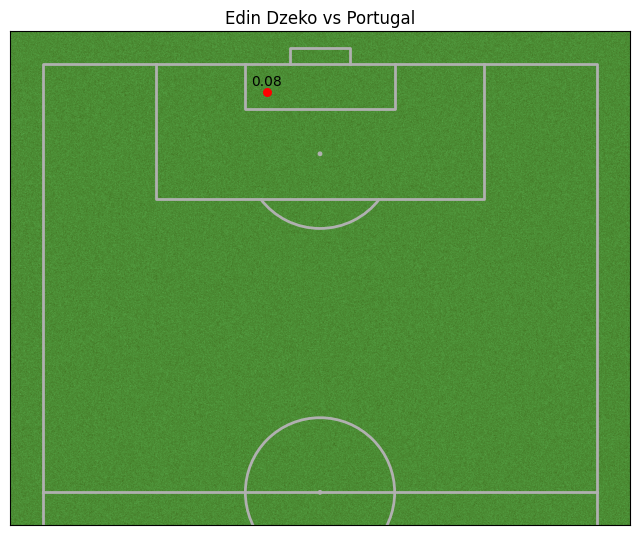

In [60]:
fig = plt.figure(figsize = (8,8), dpi = 100)
ax = plt.subplot(111)

colors = "red"

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "uefa",
    half = True,
    axis = True, 
    label = False, 
    tick = False,
    pitch_color='grass',
    goal_type='box'
)

pitch.draw(ax = ax)

# Hypothetical shot.
for i in range(length):
    if last_game["shots"][i]["playerName"] == playername:
        ax.set_title(playername + " vs " + oppName1)
    if last_game["shots"][i]["playerName"] == playername and last_game["shots"][i]["eventType"] == "Goal":
        colors = "darkgreen"
        ax.scatter(last_game["shots"][i]["y"],last_game["shots"][i]["x"], s = 30, c=colors)
        ax.annotate(round(last_game["shots"][i]["expectedGoals"], 2), (last_game["shots"][i]["y"],last_game["shots"][i]["x"]), textcoords="offset points", xytext=(0, 5),  ha='center')
    if last_game["shots"][i]["playerName"] == playername and last_game["shots"][i]["eventType"] != "Goal":
        colors = "red"
        ax.scatter(last_game["shots"][i]["y"],last_game["shots"][i]["x"], s = 30, c=colors)
        ax.annotate(round(last_game["shots"][i]["expectedGoals"], 2), (last_game["shots"][i]["y"],last_game["shots"][i]["x"]), textcoords="offset points", xytext=(0, 5),  ha='center')


